#  IRIS Classification

### Classification of IRIS flowers 

In [1]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://upload.wikimedia.org/wikipedia/commons/4/41/Iris_versicolor_3.jpg", width=200, height=200)

In [2]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, Dropout
from keras import regularizers
from keras.callbacks import EarlyStopping, TensorBoard
import matplotlib.pyplot as plt
%matplotlib inline

c:\Users\Richa\AppData\Local\Programs\Python\Python39\lib\site-packages\requests\__init__.py:102: RequestsDependencyWarning: urllib3 (1.26.8) or chardet (5.1.0)/charset_normalizer (2.0.12) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "


In [3]:
# Load the IRIS dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
#show it as a table
df = pd.DataFrame(data=iris.data)
df.columns = [iris.feature_names]
df['Class'] = iris.target
df['Name'] = iris.target_names[iris.target]
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Class,Name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [5]:
# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### <span style="color:cornflowerblue">Exercise:</span> 
1. Define and Train a Neural Network that can classify IRIS flowers
2. Add Dropouts and show the effects on model training
3. Add Regularization L1/L2 and show the effects on model training

In [6]:
# Define the model
def create_model(input_dim):
    model = Sequential()
    
    # Input layer
    model.add(Dense(64, activation='relu', input_dim=input_dim))
    
    # Hidden layers

    
    # Output layer
    model.add(Dense(3, activation='softmax'))
    
    return model

# Create the model
model = create_model(X_train.shape[1])

In [7]:
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5)  # Early stopping
tensorboard = TensorBoard(log_dir='./logs')  # TensorBoard logs

In [8]:
# Train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=32, 
          callbacks=[early_stopping, tensorboard], verbose=0)

In [9]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy:.4f}')

1/1 [==============================] - 0s 51ms/step - loss: 0.0917 - accuracy: 1.0000
Test Loss: 0.0917
Test Accuracy: 1.0000


Text(0.5, 1.0, 'Loss Curves')

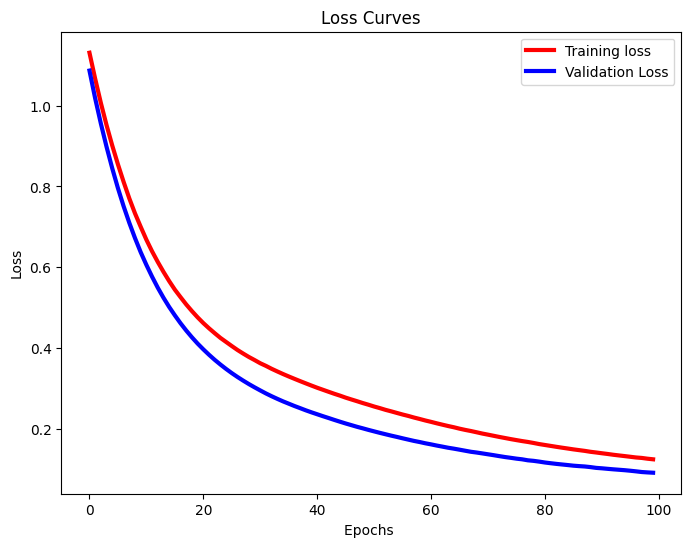

In [10]:
#Plot loss and accuracy
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'])
plt.xlabel('Epochs ')
plt.ylabel('Loss')
plt.title('Loss Curves')

In [11]:
#!tensorboard --logdir ./logs